<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/SpamData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df=pd.read_csv('spam.csv',encoding='latin-1')[['v1', 'v2']]
df.columns=['label','message']

In [3]:
df['label']=df['label'].map({'ham':0,'spam':1})

In [4]:
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()
stop_words=set(stopwords.words('english'))

In [5]:
def preprocessing(text):
  text=re.sub(r'\W',' ',text)
  text=text.lower()
  text=text.split()
  text=[stemmer.stem(word) for word in text if word not in stop_words]
  return ' '.join(text)

In [6]:
df['clean_message']=df['message'].apply(preprocessing)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(max_features=5000)
X=vectorizer.fit_transform(df['clean_message']).toarray()
y=df['label'].values

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [9]:
params={'alpha':[0.1,0.5,1,2,5,10]}



In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
mnb=MultinomialNB()
model=GridSearchCV(mnb,params,cv=10,scoring='accuracy')
model.fit(X_train,y_train)

model=model.best_estimator_

In [13]:
y_pred=model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("Confusion matrix: ",confusion_matrix(y_test,y_pred))
print("Classification report: ",classification_report(y_test,y_pred))

Accuracy score:  0.9883408071748879
Confusion matrix:  [[965   1]
 [ 12 137]]
Classification report:                precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



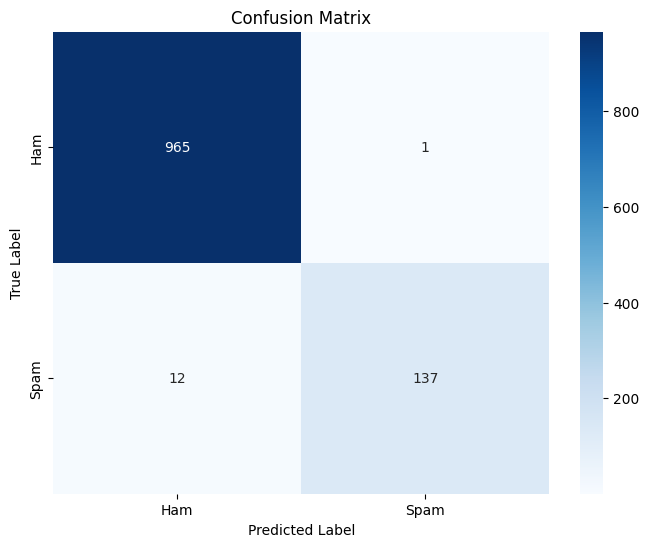

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
